# Project 1

This assessment is marked out of 100 and comprises 20% of the final course mark.

Due by 4pm on Thursday November 4th, to be submitted on Learn.

### Academic misconduct

The assessment is summative in nature. You are expected to be aware of and abide by University policies on academic misconduct.

- [School of Mathematics academic misconduct advice and policies](https://teaching.maths.ed.ac.uk/main/undergraduate/studies/assessment/academic-misconduct)
- [Academic Services academic misconduct information](https://www.ed.ac.uk/academic-services/students/conduct/academic-misconduct)

**This is an individual assignment - do not copy the work of another student or show your own work to another student.**

If you use any resources (e.g. textbooks or websites), then you must include appropriate references in your solutions. Course materials do not need to be referenced, but you should clearly state which results you are using.


### Code commentary

Your code should be extensively commented, with the functionality of each line of code explained with a comment. This is to test your understanding of the code you have written. Up to half of the marks associated with the coding part of a question may be deducted for a missing, incomplete, or inaccurate code commentary.

The following provides an example of the expected level of commenting.

In [16]:
def LU(A):
    
    # Find dimension of A
    n = A.shape[0]
    
    # Initialise L=I, U=A
    L = np.eye(n) 
    U = np.copy(A)

    for k in range(n - 1): # loop over columns 1 to n-1
        for j in range(k + 1, n): # loop over rows k+1 to n
            L[j, k] = U[j, k] / U[k ,k] # compute the multiplier l_jk
            U[j, k:] = U[j, k:] - L[j, k] * U[k, k:] # subtract a multiple of row k from row j to create zeros 
                                                     # below the diagonal in column k

    return L, U # return the LU factorisation of A

### Code efficiency

To obtain full marks, your code should be *efficient* in the sense of avoiding unnecessary artihmetic operations and having low computational cost. 

### Output 

Your code must generate and display all relevant output when run. Rerun your code cells after editing your code, to make sure that the output is updated and displayed when you submit your notebook.

### Re-using code and built-in functions

You can re-use your own code from previous workshops. You can also use the model solutions for workshop exercises posted on Learn, and Jupyter notebooks from lecture material posted on Learn. You do NOT need to comment re-used code, but you should clearly indicate from where you have taken the code. 

You may use any built-in Python functions as required.

### Written exercises

You can enter your answers to theoretical questions, i.e. questions 1.2, 2.1, discussion in 2.5, discussion in 2.6, 3.1, 3.2 and 3.3, in the Markdown cells provided in this notebook. To start editing the cell, press shift+enter or double click on it. You can use basic Latex. To render the cell, press shift+enter or run.

Alternatively, you can submit your hand-written and scanned answers to the theoretical questions as a pdf on Learn, alongside this notebook. 

You should provide a clear and justified argument written in full sentences.

# Question 1
  
Let $\bf A \in \mathbb R^{n \times n}$ be non-singular.

Recall that elementary row operations on matrices in $\mathbb R^{n \times n}$ are the following operations:

1. Swapping two rows
2. Multiplying a row by non-zero real number
3. Subtracting a non-zero multiple of one row from a different row

The following is a fundamental theorem in linear algebra.

***Theorem*** If a sequence of elementary row operations applied to $\bf A$ results in the identity matrix $\bf I$, then the same sequence of elementary operations applied to $\bf I$ results in $\bf A^{-1}$.

### 1.1

Study the code in the code cell below. Comment the code to the level explained at the beginning of this notebook, including a statement about what the output of the function is. Your comments should explain what each line does, as well as why (what does it achieve?).

**[10 marks]**

In [17]:
import numpy as np

def Q3(A):
    '''
    This function computes the inverse of matrix A using elementary row operations.
    Input: 
    A = a square, non-singular matrix
    Output:
    M[:, n:]: returns nxn matrix A inverse 
    '''
    # Finds the number of rows of A 
    n = A.shape[0]
    
    # Initialises M1 as A and M2 as I with dimension n
    M1 = np.copy(A) 
    M2 = np.eye(n) 
    
    # Each row i in M consists of all elements of row i of A 
    # followed by all elements of row i of I
    M = np.concatenate((M1,M2),axis=1) 
    
    for k in range(n): # Loop over columns 1 to n
        
        for j in range(k): # for each column loop over rows 1 to k
            m = M[j, k] / M[k ,k] # Find the scalar to define the following row operation
            M[j, k:] = M[j, k:] - m * M[k, k:] 
            # Subtract this multiple of the kth to nth elements of row k 
            # from row j to make the elements above diagonal zero 
            # and apply the row operations to the concatenated matrix I 
            
        M[k, k:] = M[k, k:] / M[k, k] # Scale the rows so that the diagonal entries of A in M are 1
            
        for j in range(k + 1, n): # loop over rows k+1 to n
            m = M[j, k] / M[k ,k] # Find the scalar to define the following row operation
            M[j, k:] = M[j, k:] - m * M[k, k:] 
            # Complete row operations the same as above 
            # but making the entries below the diagonal zero instead
    
    return M[:,n:] 
    # By the theorem above the nxn matrix I after the row operations is now A inverse

# small example to test code
A = np.array([[2, 1, 0], [4, 3, 3], [6, 7, 8]], dtype=float)
B = Q3(A)
print(B)
print(np.matmul(B,A))


[[-0.375  1.    -0.375]
 [ 1.75  -2.     0.75 ]
 [-1.25   1.    -0.25 ]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### 1.2

Show that the computational cost of the algorithm implemented in Question 1.1 is

$$
\sum_{k=1}^n \left( \sum_{j=1}^{k-1} \left(1 + 2(2n-k+1)\right) + (2n-k+1) + \sum_{j=k+1}^n \left(1 + 2(2n-k+1)\right) \right)
$$

This simplifies to $n^3 + \frac{3}{2}n^2 - \frac{9}{2} n +3$, which you do NOT need to show.

In your argument, you may want to refer to some of the line numbers shown in the code below.

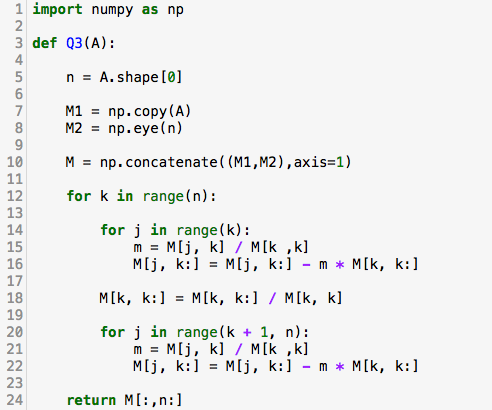

**[7 marks]**

**Answer to Q1.2**

*Double click on this cell to start typing and editing. Run the cell when you are done typing.*

# Question 2 

This question is about computing the QR factorisation of a non-singular matrix $\bf{A} \in \mathbb{R}^{n \times n}$. Recall that a QR factorisation exists for all non-singular matrices $\bf{A}$. In fact, there always exists a QR factorisation in which the diagonal entries of $\bf{R}$ are positive. 

*In the following, you may use without proof that the matrix $\bf{A}^\mathrm{T} \bf{A}$ is symmetric positive definite for any non-singular matrix $\bf{A}$. Recall from Exercise 1 in Workshop week 4 that a symmetric positive definite matrix has a Cholesky factorisation.*

### 2.1

Show that the following two statements are equivalent:

a) $\bf{A}=\bf{Q} \bf{R}$ is a QR factorisation with positive diagonal entries in $\bf{R}$,

b) $\bf{A}^\mathrm{T} \bf{A} = \bf{R}^\mathrm{T} \bf{R}$ is a Cholesky factorisation and $\bf{Q} = \bf{A} \bf{R}^{-1}$.

**[6 marks]**

**Answer to Q2.1**

*Double click on this cell to start typing and editing. Run the cell when you are done typing.*

### 2.2

Below is the pseudo-code for computing the Cholesky factorisation from Exercise 1 in Workshop week 4.

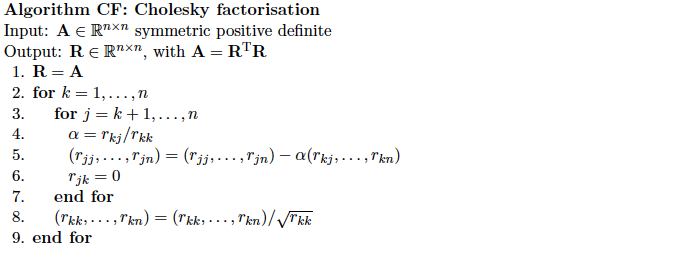

Implement this pseudo-code in the code cell below. Test your code on the example at the bottom of the code cell, to which the correct answer is 

$$
\mathbf{R} = \begin{bmatrix} 1 & 1 & 1 \\ 0 & 1 & 1 \\ 0 & 0 & 1 \end{bmatrix}.
$$

**[8 marks]**

In [18]:
import numpy as np

def chol(A):
    R = np.copy(np.array(A)) #Initialise R as A
    n = np.shape(A)[0] # Dimension of nxn matrix A
    
    for k in range(n): # Loop over rows 1 to n
        for j in range(k+1, n): # Loop over columns where j > k
            a = R[k, j]/R[k, k] # Define scalar for elementary row operation
            R[j, j:] = R[j, j:] - a*R[k , j:] # subtract a multiple of row k from row j 
            R[j, k] = 0 # more efficiently make entries under diagonal zero
            
        
        b = np.sqrt(R[k, k]) # Square root diagonal elements so R transpose R gives A[k, k]
        R[k, k:] = R[k, k:]/b # Divide through upper diagonal elements of each row by square root
        
    return R

# test code on small example
A = np.array([[1, 1, 1], [1, 2, 2], [1, 2, 3]], dtype=float)
print(chol(A))

[[1. 1. 1.]
 [0. 1. 1.]
 [0. 0. 1.]]


### 2.3

Question 2.1 shows that we can compute the QR factorisation of $\bf A$ by computing the Cholesky factorisation $\bf{A}^\mathrm{T} \bf{A} = \bf{R}^\mathrm{T} \bf{R}$ and then computing $\bf{Q} = \bf{A} \bf{R}^{-1}$.

In the code cell below, implement this approach for computing the QR factorisation using your function *chol* from Question 2.2. Test your code on the example given at the bottom of the code cell, to which the correct answer is 

$$
\mathbf{Q} = \begin{bmatrix} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{3}} & -\frac{1}{\sqrt{6}} \\ 0 & \frac{1}{\sqrt{3}} & \frac{2}{\sqrt{6}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{3}} & \frac{1}{\sqrt{6}} \end{bmatrix} \approx \begin{bmatrix} 0.70710678 & 0.57735027 & -0.40824829 \\ 0 & 0.57735027 & 0.81649658 \\ 0.70710678 & -0.57735027 & 0.40824829 \end{bmatrix}
$$

and

$$
\mathbf{R} = \begin{bmatrix} \sqrt{2} & \sqrt{2} & \frac{1}{\sqrt{2}} \\ 0 & \sqrt{3} & 0 \\ 0 & 0 & \frac{\sqrt{6}}{2} \end{bmatrix} \approx \begin{bmatrix} 1.41421356 & 1.41421356 & 0.70710678 \\ 0 & 1.73205081 & 0 \\ 0 & 0 & 1.22474487 \end{bmatrix}.
$$

*If you do not have a working solution to Question 2.2, you may finish the remainder of Question 2 using the built-in function np.linalg.cholesky instead.*

**[8 marks]**

In [19]:
import numpy as np

def my_qr(A):
    '''
    Finds QR factorisation of A using Cholesky factorisation to find R.
    '''
    ATA = A.transpose()@A
    
    R = chol(ATA) # Find R using Cholesky factorisation
    
    # A = Q @ R  =>  Q = A @ R^-1
    Q =  A @ Q3(R) # Solve for Q using inverse algorithm in question 1
    
    return Q, R

# test method on small example
A = np.array([[1, 2, 0], [0, 1, 1], [1, 0, 1]], dtype=float)
Q, R = my_qr(A)
print(f'Q = \n {Q} \n')
print(f'R = \n {R} ')

Q = 
 [[ 0.70710678  0.57735027 -0.40824829]
 [ 0.          0.57735027  0.81649658]
 [ 0.70710678 -0.57735027  0.40824829]] 

R = 
 [[1.41421356 1.41421356 0.70710678]
 [0.         1.73205081 0.        ]
 [0.         0.         1.22474487]] 


### 2.4

What is the computational cost of the algorithm that you implemented in Question 2.3? Write down the cost explicitly, and do not use $\mathcal O(\cdot)$ notation.

**[6 marks]**

**Answer to Q2.4**

*Double click on this cell to start typing and editing. Run the cell when you are done typing.*

### 2.5

Investigate the performance of algorithm *qr* from Question 2.3 compared to that of Algorithm GS and the built-in Python function *np.linalg.qr* in terms of accuracy of the QR factorisation and computational cost. 

You should choose a suitable range of tests to run (which you think are important), implement these tests in the code cell below, display your results and discuss your results in light of course material. Do you notice any trends in the results? Are the results as expected? 

**[25 marks]**

In [20]:
import numpy as np
import time

def randsvd(n, kappa):
    '''
    Generates an random nxn matrix A with condition number kappa 
    that has a QR factorisation where Q is random from the Haar distribution,
    and A is symmetric positive-definite.
    ----------------
    Inputs:
    n = integer input, dimension of output matrix A
    kappa = positive real number, condition number of output A
    Outputs:
    A = matrix A in R^nxn
    '''
    s = np.zeros(n)
    for i in range(n): # Loop over elements in s
        beta = kappa**(1/(n-1)) 
        s[i] = beta**(-i)
    S = np.diag(s) # Diagonal matrix to multiply Q or Q transpose by to make A positive definite
    
    def haar(n): 
        A = np.random.randn(n, n)
        Q, R = np.linalg.qr(A) # qr factorises random A in R^n  

        for i in range(n): # Loop over diagonal elements of R
        # adjusts Q so that QR factorisation of A_prime will have all positive diagonal R values 
            if R[i, i] < 0: 
                Q[:, i] *= -1
        return Q
    
    A_prime = haar(n) @ S @ haar(n).T
    
    return A_prime


def backsub(U, y): # Taken from week 2 course material
    '''
    To solve Rx = y in the second step of solving Ax = b where A = QR.
    ---------
    Input: 
    U = upper triangular nxn matrix R
    y = n dimensional vector y from Qy = b
    Output:
    x = vector in R^n
    '''
    n = U.shape[0]
    x = np.zeros(n)
    
    for j in range(n-1, -1, -1):
        x[j] = (y[j] - U[j, j+1:] @ x[j+1:]) / U[j, j]
    
    return x

# Taken from week 4 Jupyter notebook
def QR_tests(A, b, QR_fun, xsol): 
    '''
    Compute the QR factorisation of A using the function QR_fun,
    solves Ax = b, computes and returns the required 2-norms.
    '''
    n = A.shape[0] # Finds dimension of matrix A
    
    t0 = time.time() 
    Q, R = QR_fun(A) #QR factorises by specified method
    t1 = time.time() - t0 # Find time taken

    # Finds error in QTQ and calculated QR using 2 norm
    e_QTQ = np.linalg.norm(Q.T @ Q - np.eye(n), 2)
    e_QR = np.linalg.norm(Q @ R - A, 2)
    
    # Compute y = Q^T b, solve Rx = y using backsubstitution
    y = Q.T @ b
    x = backsub(R, y)
    
    # Compute the 2-norm of the error, ||Ax - b||
    e_x = np.linalg.norm(x - xsol, 2)
    
    return t1, e_QTQ, e_QR, e_x

# Taken from week 4 Jupyter notebook
def GS(A):
    '''
    Uses Gram-Schmidt to find QR factorisation of input nxn matrix A.
    '''
    n = A.shape[0] # Find dimension of A
    R = np.zeros((n, n)) # Initialise R and Q
    Q = np.zeros((n, n))
    
    for j in range(n): # for columns in A
        qhat = A[:, j].copy() # Intialises qhat as column j
        
        for k in range(j):
            R[k, j] = Q[:, k].T @ A[:, j] # Finds strictly upper triangular entries of R
            qhat -= R[k, j] * Q[:, k] # subtracts the orthogonal projection of all previous columns from column k
        
        R[j, j] = np.linalg.norm(qhat, 2) # Computes positive diagonal entries of R
        Q[:, j] = qhat / R[j, j] # Orthonormalises orthogonal Q

    return Q, R

def time_accuracy(f, n, start, stop, num):
    '''
    Takes QR factorisation method and finds time taken and error 
    for a number of n values for a specified condition value kappa.
    ----------
    Inputs:
    f = QR factorisation method, must be a function
    start = initial exponent p for value k = 10^p for nxn test matrix A
    stop = final exponent p for value n = 10^p for nxn test matrix A
    num = number of kappa values between and including start and stop
    n = desired dimension of test matrix A
    Outputs: for specified QR factorisation of nxn matrix A for each n
    t = vector of time values 
    e_QTQ = 2 norm of error in QTQ
    e_QR = 2 norm of error in QR
    e_x = 2 norm of error in x as solution to Ax = b compared to QRx = b.
    k_vals = vector of test kappa values
    '''
    
    # Initialising vectors of kappa, time and error values
    k_vals = np.zeros(num)
    t = np.zeros(num) 
    e_QTQ = k_vals.copy() 
    e_QR = k_vals.copy()
    e_x = k_vals.copy()
    
    for k in range(num): # Loop over kappa values
        d = (1/(num - 1))*(stop - start)
        p = start + k*d
        kappa = 10**p # condition number of A, logarithmically spaced
        k_vals[k] = kappa
        
        A = randsvd(n, kappa) # Random symmetric positive definite nxn matrix
        
        # Run accuracy tests
        xsol = np.ones(n)
        b = A@xsol # Compute value b to later resolve for known x
        
        t1, e_QTQ1, e_QR1, e_x1 = QR_tests(A, b, f, xsol)
        
        # Store computed values in each respective vector
        t[k] = t1
        e_QTQ[k] = e_QTQ1
        e_QR[k] = e_QR1
        e_x[k] = e_x1
    
    return t, e_QTQ, e_QR, e_x, k_vals
            

def plot_t(f, start, stop, num):
    '''
    Plots time against dimension n of A for num kappa values from start to stop.
    '''
    # Initialise vectors for dimension of A 
    # and computation time for each kappa and n
    n_vals = np.zeros(6)
    time = np.zeros((num, 6))
    for j in range(6): # Loop over n values
        n = int(2**(j+5))
        n_vals[j] = n
        t, e_QTQ, e_QR, e_x, k_vals = time_accuracy(f, n, start, stop, num)
        time[:,j] = t 
    
    for r in range(num): # Plot graph t vs n for each kappa
        ax[r].set_title(f'kappa = {k_vals[r]}')
        ax[r].plot(n_vals, time[r,:], label = f.__name__)
        ax[r].set_xlabel(r'dimension of matrix $n$')
        ax[r].set_ylabel(r'time $t$')
        ax[r].set_yscale('log')
        ax[r].set_xscale('log')
        ax[r].legend()
        
def plot_r(f, n, start, stop, num):
    '''
    Plots accuracy against condition number kappa for num kappa values from start to stop.
    '''
    t, e_QTQ, e_QR, e_x, k_vals = time_accuracy(f, n, start, stop, num)

    # Plot each error on different axes in the figure
    ax[0].plot(k_vals, e_QTQ,label = f.__name__) 
    ax[0].set_xlabel(r'condition number of matrix $k$')
    ax[0].set_ylabel(r'2 norm of residual of $QTQ$')
    ax[1].plot(k_vals, e_QR, label = f.__name__) 
    ax[1].set_xlabel(r'condition number of matrix $k$')
    ax[1].set_ylabel(r'2 norm of residual of $QR$')
    ax[2].plot(k_vals, e_x, label = f.__name__) 
    ax[2].set_xlabel(r'condition number of matrix $k$')
    ax[2].set_ylabel(r'2 norm of residual of $x$')
    ax[0].set_yscale('log')
    ax[0].set_xscale('log')
    ax[1].set_yscale('log')
    ax[1].set_xscale('log')
    ax[2].set_yscale('log')
    ax[2].set_xscale('log')
    
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
    


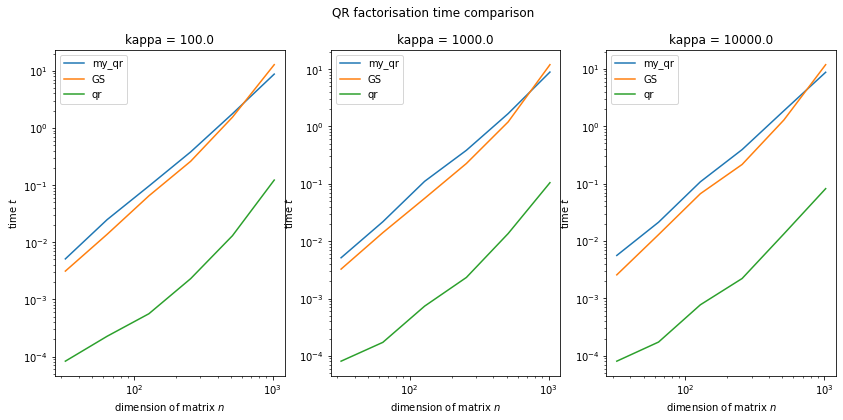

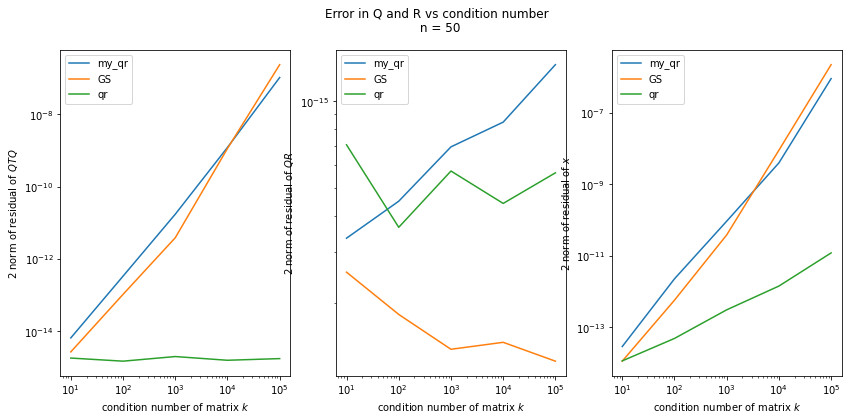

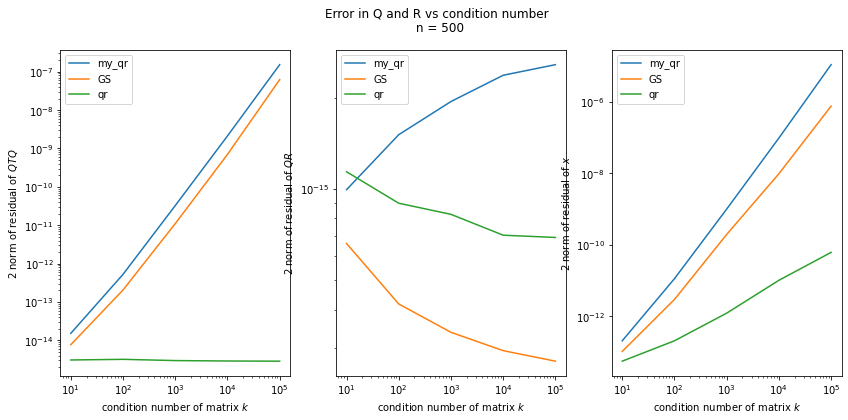

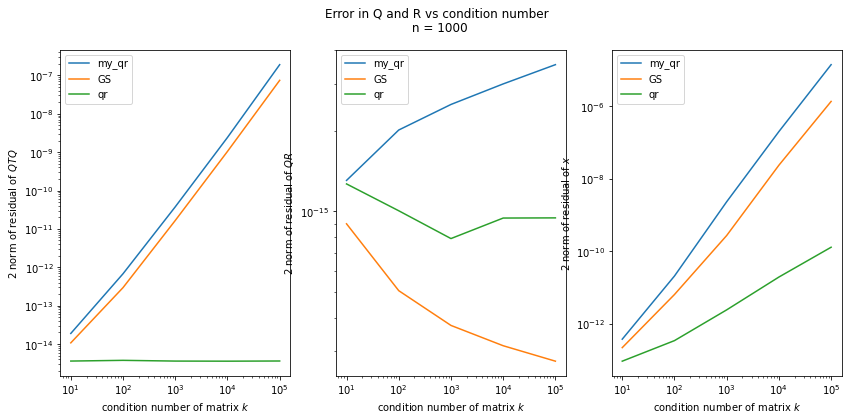

In [24]:
# Plot Results
import matplotlib.pyplot as plt

QR_methods = [my_qr, GS, np.linalg.qr]

start = 2
stop = 4
num = 3

# Create a figure of 3 graphs, one for each kappa
fig, ax = plt.subplots(1, num, figsize = (14, 6))
fig.suptitle('QR factorisation time comparison')

for k in range(len(QR_methods)): # Loop over each qr method 
    f = QR_methods[k]
    plot_t(f, start, stop, num) # Compare them on the same graphs

plt.show()

n_vals = [50, 500, 1000]
for i in range(3): # Loop over n values
    n = n_vals[i]
    s = 1
    st = 5
    number = 5 # Choose 5 kappa values to plot error against
    fig, ax = plt.subplots(1, 3, figsize = (14, 6))
    fig.suptitle(f'Error in Q and R vs condition number \n n = {n}')

    for k in range(len(QR_methods)): # Loop over qr methods
        f = QR_methods[k]
        plot_r(f, n, s, st, number) # Plot errors


plt.show()


**Answer to Q2.5**


Discuss your results here.

### 2.6 

In exact arithmetic, the matrix $\mathbf{Q}$ computed by the algorithm *qr* in Question 2.3 is orthogonal. However, in floating point arithmetic the computed matrix $\widehat{\mathbf{Q}}$ is usually not orthogonal.

Suppose we already have a computed QR factorisation $\mathbf A \approx \widehat{\mathbf{Q}}_1 \widehat{\mathbf{R}}_1$. Since the product of two upper triangular matrices is upper triangular, we can compute an updated QR factorisation $\mathbf{A} \approx \widehat{\mathbf{Q}}_2 \widehat{\mathbf{R}}_2$ by: 

1) computing a QR factorisation of $\widehat{\mathbf{Q}}_1$: $\widehat{\mathbf{Q}}_1 \approx \mathbf{P} \mathbf{S}$

2) setting $\widehat{\mathbf{Q}}_2 = \mathbf{P} $ and $\widehat{\mathbf{R}}_2 = \mathbf{S} \widehat{\mathbf{R}}_1$.

Note that in exact arithmetic, we have $\widehat{\mathbf{Q}}_2 \widehat{\mathbf{R}}_2 = (\widehat{\mathbf{Q}}_1 \mathbf{S}^{-1})( \mathbf{S} \widehat{\mathbf{R}}_1) = \widehat{\mathbf{Q}}_1 \widehat{\mathbf{R}}_1$.

(i) Implement the above methodology applied to the algorthm *qr* in Question 2.3 in the code cell below. Your code in *qr2* should take the matrix $\mathbf{A}$ as input, compute a QR factorisation of $\mathbf{A}$ using the algorithm *qr* from Question 2.3, and then apply the methodology above to update the QR factorisation. Test your code on the same example as before, given at the bottom of the code cell.

(ii) Similar to Question 2.5, investigate the performance of algorithm *qr2* from part(i) compared to that of algorithm qr from Question 2.3  and the built-in Python function *np.linalg.qr* in terms of accuracy of the QR factorisation, and discuss your results.

**[15 marks]**

In [32]:
import numpy as np

def my_qr2(A):
    Q1, R1 = my_qr(A) # Find QR factorisation by previous method
    
    P, S = my_qr(Q1) # Solve using inversion algorithm in question 1
     # Update matrices Q and R as in above method
    Q2 = P
    R2 = S@R1
    return Q2, R2

# test method on small example
A = np.array([[1, 2, 0], [0, 1, 1], [1, 0, 1]], dtype=float)
Q, R = my_qr2(A)
print(Q)
print(R)

[[ 0.70710678  0.57735027 -0.40824829]
 [ 0.          0.57735027  0.81649658]
 [ 0.70710678 -0.57735027  0.40824829]]
[[1.41421356e+00 1.41421356e+00 7.07106781e-01]
 [0.00000000e+00 1.73205081e+00 1.84440833e-17]
 [0.00000000e+00 0.00000000e+00 1.22474487e+00]]


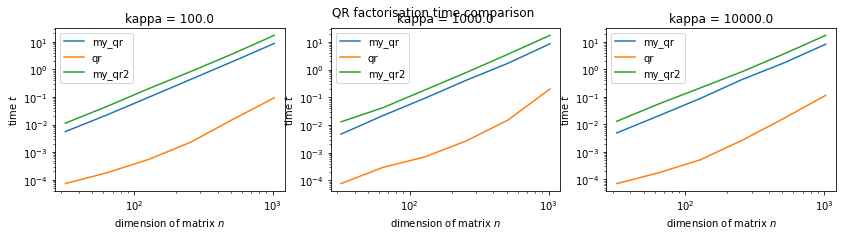

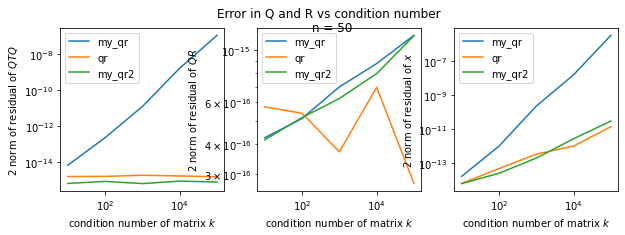

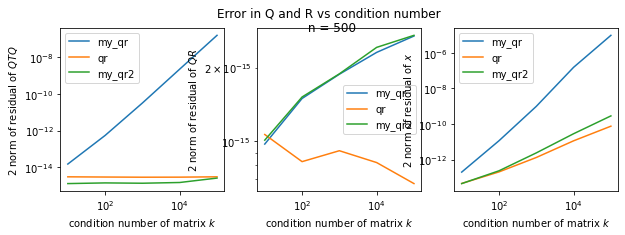

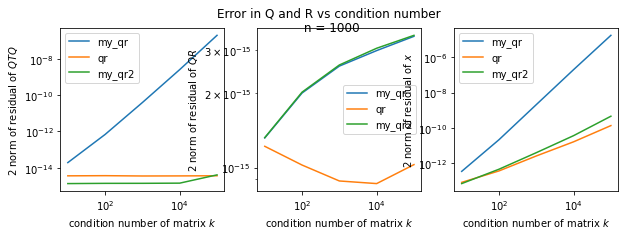

In [34]:
# add numerical tests here
import matplotlib.pyplot as plt

QR_methods = [my_qr, np.linalg.qr, my_qr2]

# Implement same tests as Q2.5
start = 2
stop = 4
num = 3

# Create a figure of 3 graphs, one for each kappa
fig, ax = plt.subplots(1, num, figsize = (14, 3))
fig.suptitle('QR factorisation time comparison')

for k in range(len(QR_methods)): # Loop over each qr method 
    f = QR_methods[k]
    plot_t(f, start, stop, num) # Compare them on the same graphs

plt.show()

n_vals = [50, 500, 1000]
for i in range(3): # Loop over n values
    n = n_vals[i]
    s = 1
    st = 5
    number = 5 # Choose 5 kappa values to plot error against
    fig, ax = plt.subplots(1, 3, figsize = (10, 3))
    fig.suptitle(f'Error in Q and R vs condition number \n n = {n}')

    for k in range(len(QR_methods)): # Loop over qr methods
        f = QR_methods[k]
        plot_r(f, n, s, st, number) # Plot errors


plt.show()


**Answer to Q2.6**

*Double click on this cell to start typing and editing. Run the cell when you are done typing.*

Discuss your results in part (ii) here.

# Question 3 

Suppose $\mathbf{A} \in \mathbb R^{n \times n}$ is symmetric positive definite. 

We saw in Exercise 2(i) in Computer lab 5 that the determinant of $\mathbf A$ can be computed in $\mathcal O(n^3)$ operations. In practice, we might not need $\mathrm{det}(\mathbf{A})$ exactly, and it might suffice to compute an upper bound on $\mathrm{det}(\mathbf{A})$.

### 3.1

Use the Cholesky factorisation to show that $\mathrm{det}(\mathbf{A}) \leq \prod_{i=1}^n a_{ii}$. Clearly state any properties of determinants that you use.

**[7 marks]**

**Answer to Q3.1**

*Double click on this cell to start typing and editing. Run the cell when you are done typing.*

### 3.2

Show that $\mathrm{det}(\mathbf{A}) = \prod_{i=1}^n a_{ii}$ if and only if $\mathbf{A}$ is diagonal.

**[6 marks]**

**Answer to Q3.2**

*Double click on this cell to start typing and editing. Run the cell when you are done typing.*

### 3.3 

What is the computational cost of computing the upper bound $\prod_{i=1}^n a_{ii}$?

**[2 marks]**

**Answer to Q3.3**

*Double click on this cell to start typing and editing. Run the cell when you are done typing.*